# <center>Analysis of the Broker-Dealer's Trading Dataset</center>

This project presents an analysis of the data concerning offers made by a broker-dealer to different clients and their outcome. It includes midprice of a given security, ID of a client making inquiry, indication whether he intends to buy or sell, price offered by a broker-dealer, and the outcome of the deal (whether it was accepted or not).

First, two classification models are developed for each client - Logistic Regression and Linear Support Vector Machine (SVM). The data is divided into the training set and test set. The models are trained on the former, and their performance is assessed on the latter. 

Next, clustering using k-means algorithm is applied on the data in order to classify the clients based on their propensity to accept or refuse the deal depending on the offered bid-ask spread.

## Preliminaries

Import the libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, k_means
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

Read the data and create a single variable reflecting proposed bid-ask spread expressed as a fraction of the midprice

In [2]:
trading_data = pd.read_csv('trading_data.csv', sep = ",", index_col = 0)
trading_data["spread"] = (trading_data["answeredprice"] - trading_data["midprice"]) / trading_data["midprice"] * trading_data["buy/sell"] * 2

In [11]:
trading_data

,midprice,id,buy/sell,answeredprice,deal,spread
0,97.9990,4,1,98.016,0.0,0.000347
1,97.9988,4,-1,98.001,1.0,-0.000045
2,97.9951,1,-1,97.979,0.0,0.000329
3,97.9971,1,1,97.990,1.0,-0.000145
4,97.9961,1,-1,97.978,0.0,0.000369
...,...,...,...,...,...,...
2195,97.9943,1,-1,97.995,NaN,-0.000014
2196,97.9977,2,1,98.014,NaN,0.000333
2197,97.9999,3,1,98.009,NaN,0.000186
2198,98.0019,2,-1,98.007,NaN,-0.000104


Take rows with available deal agreement data, and split the dataset into 4 parts corresponding to each client in order to build 4 models

In [12]:
trading_data_model = trading_data.iloc[:2000, ]    # only the first 2000 rows have available deal data; the remaining values are null
trading_data_model_1 = trading_data_model[trading_data_model["id"] == 1]
trading_data_model_2 = trading_data_model[trading_data_model["id"] == 2]
trading_data_model_3 = trading_data_model[trading_data_model["id"] == 3]
trading_data_model_4 = trading_data_model[trading_data_model["id"] == 4]

In [13]:
trading_data_model

,midprice,id,buy/sell,answeredprice,deal,spread
0,97.9990,4,1,98.016,0.0,0.000347
1,97.9988,4,-1,98.001,1.0,-0.000045
2,97.9951,1,-1,97.979,0.0,0.000329
3,97.9971,1,1,97.990,1.0,-0.000145
4,97.9961,1,-1,97.978,0.0,0.000369
...,...,...,...,...,...,...
1995,97.9966,1,-1,97.999,1.0,-0.000049
1996,97.9958,3,-1,97.988,0.0,0.000159
1997,98.0002,4,1,97.984,1.0,-0.000331
1998,98.0028,2,-1,97.985,0.0,0.000363


Split the data into train sets and test sets; since we transformed data reflecting mid- and answered price into spread, we can take only two variables

In [14]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(trading_data_model_1[["spread", "buy/sell"]], trading_data_model_1["deal"], train_size = 0.9)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(trading_data_model_2[["spread", "buy/sell"]], trading_data_model_2["deal"], train_size = 0.9)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(trading_data_model_3[["spread", "buy/sell"]], trading_data_model_3["deal"], train_size = 0.9)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(trading_data_model_4[["spread", "buy/sell"]], trading_data_model_4["deal"], train_size = 0.9)

Function evaluating performance

In [15]:
def performance(y_real, y_predicted):
    print('The confusion matrix is:')
    print(confusion_matrix(y_real, y_predicted))
    metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1': f1_score}
    for metrics, func in metrics.items():
        print(metrics+': %.2f'%(func(y_real, y_predicted)))

## Logistic Regression

First we build a logistic regression model for client 1 based on the training set, and we evaluate it on the test set

In [51]:
log_reg_1 = LogisticRegression(max_iter = 500, penalty = None, tol = 1e-6)
log_reg_1.fit(X_train_1, y_train_1)
y_train_1_predicted_lr = log_reg_1.predict(X_train_1)
performance(y_train_1, y_train_1_predicted_lr)

The confusion matrix is:
[[207  15]
 [ 11 203]]
Accuracy: 0.94
Precision: 0.93
Recall: 0.95
F1: 0.94


In [53]:
y_test_1_predicted_lr = log_reg_1.predict(X_test_1)
performance(y_test_1, y_test_1_predicted_lr)

The confusion matrix is:
[[21  5]
 [ 1 22]]
Accuracy: 0.88
Precision: 0.81
Recall: 0.96
F1: 0.88


Next we do the same with client number 2

In [55]:
log_reg_2 = LogisticRegression(max_iter = 500, penalty = None, tol = 1e-6)
log_reg_2.fit(X_train_2, y_train_2)
y_train_2_predicted_lr = log_reg_2.predict(X_train_2)
performance(y_train_2, y_train_2_predicted_lr)

The confusion matrix is:
[[176  33]
 [ 34 207]]
Accuracy: 0.85
Precision: 0.86
Recall: 0.86
F1: 0.86


In [56]:
y_test_2_predicted_lr = log_reg_2.predict(X_test_2)
performance(y_test_2, y_test_2_predicted_lr)

The confusion matrix is:
[[16  8]
 [ 3 24]]
Accuracy: 0.78
Precision: 0.75
Recall: 0.89
F1: 0.81


Client no. 3

In [57]:
log_reg_3 = LogisticRegression(max_iter = 500, penalty = None, tol = 1e-6)
log_reg_3.fit(X_train_3, y_train_3)
y_train_3_predicted_lr = log_reg_3.predict(X_train_3)
performance(y_train_3, y_train_3_predicted_lr)

The confusion matrix is:
[[216  10]
 [ 13 208]]
Accuracy: 0.95
Precision: 0.95
Recall: 0.94
F1: 0.95


In [58]:
y_test_3_predicted_lr = log_reg_3.predict(X_test_3)
performance(y_test_3, y_test_3_predicted_lr)

The confusion matrix is:
[[19  2]
 [ 0 29]]
Accuracy: 0.96
Precision: 0.94
Recall: 1.00
F1: 0.97


Client no. 4

In [60]:
log_reg_4 = LogisticRegression(max_iter = 500, penalty = None, tol = 1e-6)
log_reg_4.fit(X_train_4, y_train_4)
y_train_4_predicted_lr = log_reg_4.predict(X_train_4)
performance(y_train_4, y_train_4_predicted_lr)

The confusion matrix is:
[[168  30]
 [ 36 231]]
Accuracy: 0.86
Precision: 0.89
Recall: 0.87
F1: 0.88


In [61]:
y_test_4_predicted_lr = log_reg_4.predict(X_test_4)
performance(y_test_4, y_test_4_predicted_lr)

The confusion matrix is:
[[21  6]
 [ 2 23]]
Accuracy: 0.85
Precision: 0.79
Recall: 0.92
F1: 0.85


It can be observed that the overall performance is slightly better for the models corresponding to clients 1&3 than for the models corresponding to clients 2&4.

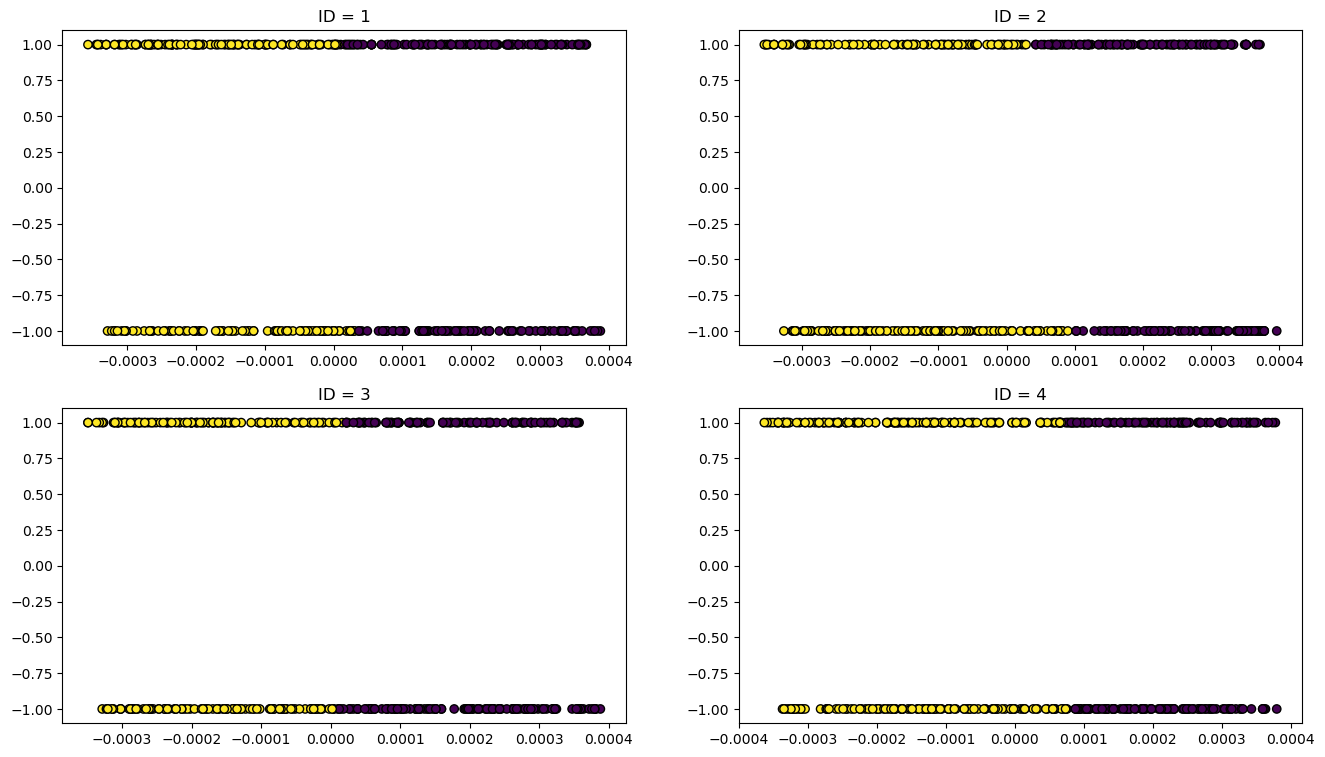

In [63]:
#plt.rcParams["figure.figsize"] = (16,9)
#plt.scatter(trading_data_model_2["spread"], trading_data_model_2["answeredprice"], c = trading_data_model_2["deal"], edgecolor = 'k')

f, axs = plt.subplots(2, 2, figsize = (16,9))

axs[0, 0].scatter(X_train_1["spread"], X_train_1["buy/sell"], c = y_train_1_predicted_lr, edgecolor = 'k')
axs[0, 0].set_title("ID = 1")

axs[0, 1].scatter(X_train_2["spread"], X_train_2["buy/sell"], c = y_train_2_predicted_lr, edgecolor = 'k')
axs[0, 1].set_title("ID = 2")

axs[1, 0].scatter(X_train_3["spread"], X_train_3["buy/sell"], c = y_train_3_predicted_lr, edgecolor = 'k')
axs[1, 0].set_title("ID = 3")

axs[1, 1].scatter(X_train_4["spread"], X_train_4["buy/sell"], c = y_train_4_predicted_lr, edgecolor = 'k')
axs[1, 1].set_title("ID = 4")

plt.show()

Moreover, we can notice that clients 2 and 4 accept higher spreads.

## Linear Support Vector Machine

In [64]:
svm_1 = LinearSVC(penalty = 'l1', dual = False, max_iter = 50000, C = 1000.0)
svm_1.fit(X_train_1, y_train_1)
y_train_1_predicted_svm = svm_1.predict(X_train_1)
performance(y_train_1, y_train_1_predicted_svm)

The confusion matrix is:
[[207  15]
 [ 11 203]]
Accuracy: 0.94
Precision: 0.93
Recall: 0.95
F1: 0.94


In [65]:
y_test_1_predicted_svm = svm_1.predict(X_test_1)
performance(y_test_1, y_test_1_predicted_svm)

The confusion matrix is:
[[21  5]
 [ 1 22]]
Accuracy: 0.88
Precision: 0.81
Recall: 0.96
F1: 0.88


In [70]:
svm_2 = LinearSVC(penalty = 'l1', dual = False, max_iter = 50000, C = 1000.0)
svm_2.fit(X_train_2, y_train_2)
y_train_2_predicted_svm = svm_2.predict(X_train_2)
performance(y_train_2, y_train_2_predicted_svm)

The confusion matrix is:
[[177  32]
 [ 34 207]]
Accuracy: 0.85
Precision: 0.87
Recall: 0.86
F1: 0.86


In [71]:
y_test_2_predicted_svm = svm_2.predict(X_test_2)
performance(y_test_2, y_test_2_predicted_svm)

The confusion matrix is:
[[16  8]
 [ 3 24]]
Accuracy: 0.78
Precision: 0.75
Recall: 0.89
F1: 0.81


In [72]:
svm_3 = LinearSVC(penalty = 'l1', dual = False, max_iter = 50000, C = 1000.0)
svm_3.fit(X_train_3, y_train_3)
y_train_3_predicted_svm = svm_3.predict(X_train_3)
performance(y_train_3, y_train_3_predicted_svm)

The confusion matrix is:
[[216  10]
 [ 13 208]]
Accuracy: 0.95
Precision: 0.95
Recall: 0.94
F1: 0.95


In [73]:
y_test_3_predicted_svm = svm_3.predict(X_test_3)
performance(y_test_3, y_test_3_predicted_svm)

The confusion matrix is:
[[19  2]
 [ 0 29]]
Accuracy: 0.96
Precision: 0.94
Recall: 1.00
F1: 0.97


In [78]:
svm_4 = LinearSVC(penalty = 'l1', dual = False, max_iter = 50000, C = 1000.0)
svm_4.fit(X_train_4, y_train_4)
y_train_4_predicted_svm = svm_4.predict(X_train_4)
performance(y_train_4, y_train_4_predicted_svm)

The confusion matrix is:
[[173  25]
 [ 40 227]]
Accuracy: 0.86
Precision: 0.90
Recall: 0.85
F1: 0.87


In [79]:
y_test_4_predicted_svm = svm_4.predict(X_test_4)
performance(y_test_4, y_test_4_predicted_svm)

The confusion matrix is:
[[21  6]
 [ 2 23]]
Accuracy: 0.85
Precision: 0.79
Recall: 0.92
F1: 0.85


The results for the Linear SVM models are the same as for the Logistic Regression models.

## Probabilities

For each offer estimate the probability that a client will agree for the deal using developed Logistic Regression models

In [80]:
trading_data["prob"] = np.where(trading_data["id"] == 1, log_reg_1.predict_proba(trading_data[["spread", "buy/sell"]])[:,1], 0)
trading_data["prob"] = np.where(trading_data["id"] == 2, log_reg_2.predict_proba(trading_data[["spread", "buy/sell"]])[:,1], trading_data["prob"])
trading_data["prob"] = np.where(trading_data["id"] == 3, log_reg_3.predict_proba(trading_data[["spread", "buy/sell"]])[:,1], trading_data["prob"])
trading_data["prob"] = np.where(trading_data["id"] == 4, log_reg_4.predict_proba(trading_data[["spread", "buy/sell"]])[:,1], trading_data["prob"])

In [81]:
trading_data

,midprice,id,buy/sell,answeredprice,deal,spread,prob
0,97.9990,4,1,98.016,0.0,0.000347,0.017230
1,97.9988,4,-1,98.001,1.0,-0.000045,0.848842
2,97.9951,1,-1,97.979,0.0,0.000329,0.000005
3,97.9971,1,1,97.990,1.0,-0.000145,0.998076
4,97.9961,1,-1,97.978,0.0,0.000369,0.000001
...,...,...,...,...,...,...,...
2195,97.9943,1,-1,97.995,NaN,-0.000014,0.881425
2196,97.9977,2,1,98.014,NaN,0.000333,0.028211
2197,97.9999,3,1,98.009,NaN,0.000186,0.003784
2198,98.0019,2,-1,98.007,NaN,-0.000104,0.914546


The last column of the above table contains predictions of the probability of deal agreement according to the logistic regression model

## Clustering

In order to develop a model clustering the clients, we will use k-means algorithm. We want to cluster the clients based on their propensity to accept the offer depending on the proposed spread. If we input the raw data into the model, we will get two types of situations - when the deal is agreed and the spread is low and the opposite. Therefore, we need to transform the data in order to obtain a variable reflecting the relation of deal agreement probability to the proposed spread (or rather, to its inverse). Moreover, we don't want to treat ID variable as a continuous one. Instead, we will create 4 binary variables correspoding to 4 clients.

In [157]:
trading_data_kmeans = trading_data.copy()
trading_data_kmeans["spread"] = StandardScaler().fit_transform(trading_data_kmeans[["spread"]])
trading_data_kmeans["proba_spread"] = trading_data_kmeans["prob"] / np.exp(-trading_data_kmeans["spread"])
#trading_data_kmeans["spread_proba"] = 1 / (1 + np.exp(-trading_data_kmeans["spread"])) * (1 - trading_data_kmeans["prob"])
trading_data_kmeans["id1"] = np.where(trading_data["id"] == 1, 1, 0)
trading_data_kmeans["id2"] = np.where(trading_data["id"] == 2, 1, 0)
trading_data_kmeans["id3"] = np.where(trading_data["id"] == 3, 1, 0)
trading_data_kmeans["id4"] = np.where(trading_data["id"] == 4, 1, 0)
#trading_data_kmeans["buy/sell"] = np.where(trading_data["buy/sell"] == 1, 1, 0)
trading_data_kmeans = trading_data_kmeans[["proba_spread", "id1", "id2", "id3", "id4"]]
trading_data_kmeans

,proba_spread,id1,id2,id3,id4
0,0.084050,0,0,0,1
1,0.628391,0,0,0,1
2,0.000024,1,0,0,0
3,0.456648,1,0,0,0
4,0.000005,1,0,0,0
...,...,...,...,...,...
2195,0.756068,1,0,0,0
2196,0.128481,0,1,0,0
2197,0.008497,0,0,1,0
2198,0.509253,0,1,0,0


In [158]:
kmeans = KMeans(n_clusters = 2, random_state = 1, max_iter = 5000, tol = 1e-20).fit(trading_data_kmeans)

C:\Users\wojci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [159]:
kmeans.cluster_centers_

array([[ 2.45235955e-01,  4.87895717e-01, -1.66533454e-16,
         5.12104283e-01,  2.22044605e-16],
       [ 3.94778127e-01, -5.55111512e-17,  4.95559503e-01,
         0.00000000e+00,  5.04440497e-01]])

As can be observed, about half of the records in the first cluster consist of client 1 deals, and the other half - of client 3 deals, while half of the records in the second cluster consist of client 2 deals, and the other half - of client 4 deals. Moreover, in the second group the ratio of probability to the transformed spread is higher. Unfortunately, the relationship is not strong enough, so the result depends on the chosen random state. For the seed set above we obtain the described result, but it is not always the case. 